**Nama : Johannes Agusto Lilipaly**
**NIM  : 120140093**

**Membuat Gelombang Sinus dan Cosinus dan Perbandingan Subplot**

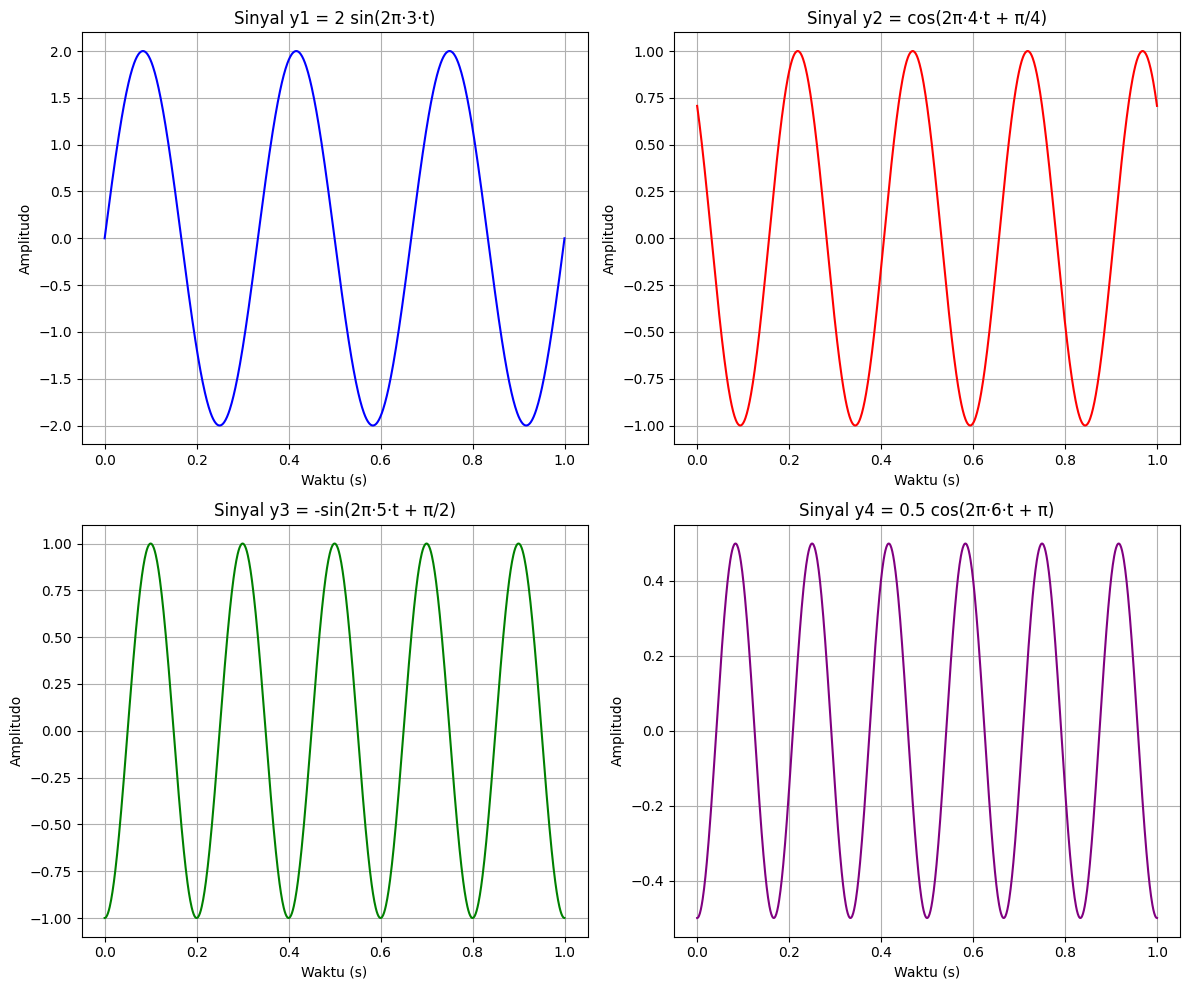

In [5]:
import numpy as np
import matplotlib.pyplot as plt 

t = np.linspace(0, 1, 1000)

#Sinyal-sinyal yang digunakan
y1 = 2 * np.sin(2 * np.pi * 3 * t + 0)
y2 = 1 * np.cos(2 * np.pi * 4 * t + np.pi/4)
y3 = -1 * np.sin(2 * np.pi * 5 * t + np.pi/2)
y4 = 0.5 * np.cos(2 * np.pi * 6 * t + np.pi)

# Membuat figure dan 4 subplot (grid 2x2)
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Plot y1 
ax[0, 0].plot(t, y1, 'blue')
ax[0, 0].set_title("Sinyal y1 = 2 sin(2π·3·t)")
ax[0, 0].grid(True)
ax[0, 0].set_xlabel("Waktu (s)")
ax[0, 0].set_ylabel("Amplitudo")

# Plot y2 
ax[0, 1].plot(t, y2, 'red')
ax[0, 1].set_title("Sinyal y2 = cos(2π·4·t + π/4)")
ax[0, 1].grid(True)
ax[0, 1].set_xlabel("Waktu (s)")
ax[0, 1].set_ylabel("Amplitudo")

# Plot y3
ax[1, 0].plot(t, y3, 'green')
ax[1, 0].set_title("Sinyal y3 = -sin(2π·5·t + π/2)")
ax[1, 0].grid(True)
ax[1, 0].set_xlabel("Waktu (s)")
ax[1, 0].set_ylabel("Amplitudo")

# Plot y4
ax[1, 1].plot(t, y4, 'purple')
ax[1, 1].set_title("Sinyal y4 = 0.5 cos(2π·6·t + π)")
ax[1, 1].grid(True)
ax[1, 1].set_xlabel("Waktu (s)")
ax[1, 1].set_ylabel("Amplitudo")

# Menyelaraskan tata letak subplot
plt.tight_layout()
plt.show()

**Pertanyaan analisis**

1. Berapa amplitudo dan frekuensi masing-masing sinyal?
    Gelombang y1:
    Amplitudo = 2
    Frekuensi = 3 Hz

    Gelombang y2:
    Amplitudo = 1
    Frekuensi = 4 Hz

    Gelombang y3:
    Amplitudo = 1
    Frekuensi = 5 Hz

    Gelombang y4:
    Amplitudo = 0.5
    Frekuensi = 6 Hz

2. Bagaimana pergeseran fase mempengaruhi posisi gelombang? (Anda dapat mengubah nilai 
   fase pada sinyal-sinyal yang telah dibuat sesuka anda)
    Pergeseran fase mengubah posisi puncak dan gelombang.

3. Bandingkan sinyal-sinyal dengan amplitudo yang berbeda dan diskusikan bagaimana
   amplitudo mempengaruhi tampilan gelombang.
    Amplitudo mempengaruhi puncak dan kedalaman dari gelombang.

4. Bandingkan sinyal-sinyal dengan pergeseran fase yang berbeda dan diskusikan bagaimana pergeseran fase mempengaruhi tampilan gelombang.
    Pada gelombang y2, fase π/4 menggeser gelombang cos ke kiri sebanyak 1/4 radian dan pada gelombang y3, fase π/2 menggeser  gelombang sin ke kiri sebanyak 1/2 radian. Jadi pergeseran fase mengubah posisi puncak dan gelombang.

**Sinyal kombinasi y1 dan y2**

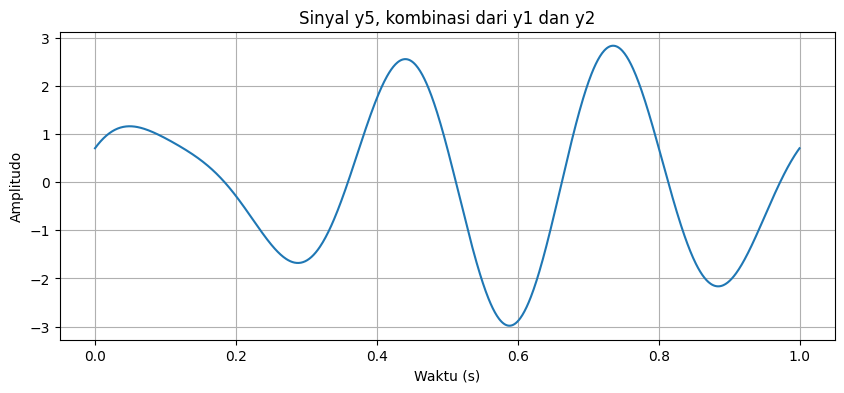

In [6]:
y5 = y1 + y2

plt.figure(figsize=(10, 4))
plt.plot(t, y5)
plt.title("Sinyal y5, kombinasi dari y1 dan y2")
plt.xlabel("Waktu (s)")
plt.ylabel("Amplitudo")
plt.grid(True)
plt.show()

# ax, fig = plt.subplots(3, 1, figsize=(10, 6))
# fig[0].plot(time_axis, signal_1)
# fig[0].set_title("Sinyal 1")
# fig[1].plot(time_axis, signal_2)
# fig[1].set_title("Sinyal 2")
# fig[2].plot(time_axis, signal_composite)
# fig[2].set_title("Sinyal Composite")
# plt.tight_layout()
# plt.show()

Hasil dari kombinasi gelombang, amplitudonya menjadi sebesar jumlah amplitudo yang dikombinasikan dari y1 dan y2. Untuk fasenya berubah bergantung pada rasio dari fase gelombang y1 dan y2.

**Downsampling**


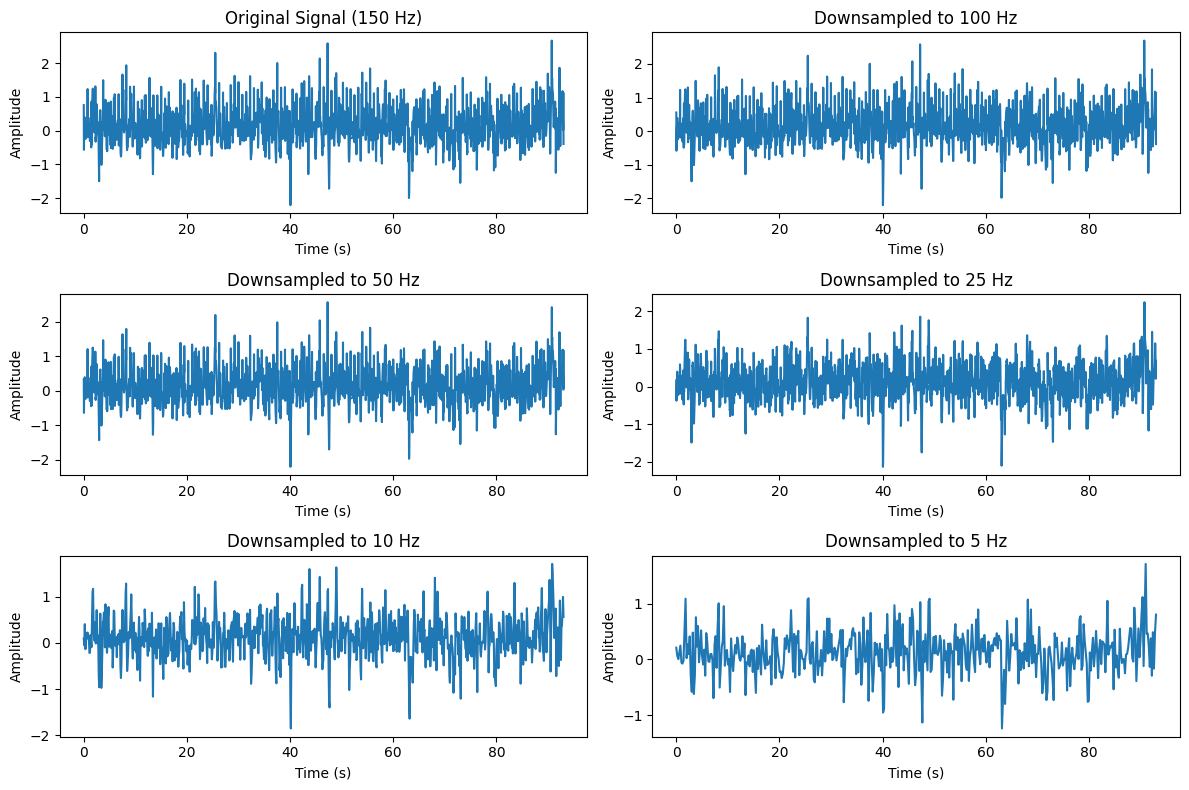

In [14]:
import neurokit2 as nk
import pywt
from scipy import signal
from obspy.core import UTCDateTime
from obspy.clients.syngine import Client
from scipy.signal import resample

#sinyal ECG sintetis
ecg_signal = nk.ecg_simulate(duration=93, 
                             sampling_rate=150, 
                             heart_rate=80, 
                             noise=0.93, 
                             random_state=20824)

# Function to resample and plot the ECG signals
def plot_resampled_signals(original_signal, original_fs, resample_rates):
    time_original = np.linspace(0, 93, len(original_signal))
    
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 2, 1)
    plt.plot(time_original, original_signal, label=f"Original ({original_fs} Hz)")
    plt.title(f"Original Signal ({original_fs} Hz)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    
    # Resampling sinyal untuk downsampling rate yang berbeda
    for i, new_fs in enumerate(resample_rates):
        num_samples = int(len(original_signal) * new_fs / original_fs)
        resampled_signal = resample(original_signal, num_samples)
        time_resampled = np.linspace(0, 93, len(resampled_signal))
        
        plt.subplot(3, 2, i+2)
        plt.plot(time_resampled, resampled_signal, label=f"Resampled ({new_fs} Hz)")
        plt.title(f"Downsampled to {new_fs} Hz")
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
    
    plt.tight_layout()
    plt.show()

# Sampling rate baru
resample_rates = [100, 50, 25, 10, 5]

# Plot asli dan yang sudah di downsampling
plot_resampled_signals(ecg_signal, 150, resample_rates)


Aliasing terjadi ketika sinyal yang direkam atau direproduksi pada frekuensi yang lebih rendah daripada frekuensi aslinya, sehingga menciptakan kesan palsu tentang sinyal tersebut. (source : https://warstek.com/aliasing-sinyal/)

Order menunjukkan jumlah elemen dalam filter yang mempengaruhi seberapa tajam filter memisahkan antara frekuensi yang ingin diteruskan dan yang ingin diblokir. 

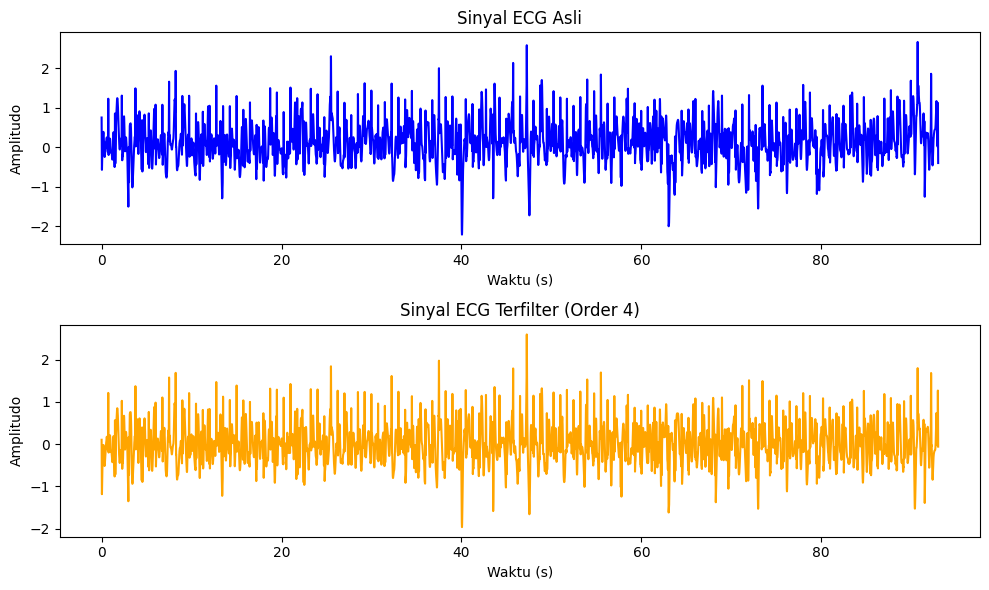

In [15]:
import neurokit2 as nk
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Parameter filter
sampling_rate = 150  # Hz
lowcut = 0.5  # Frekuensi cutoff rendah (Hz)
highcut = 40  # Frekuensi cutoff tinggi (Hz)
order = 4  # Order filter

# Desain filter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs  # Frekuensi Nyquist
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Penerapan Filter
def apply_filter(data, lowcut, highcut, fs, order):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Filter sinyal dengan order 4
filtered_signal = apply_filter(ecg_signal, lowcut, highcut, sampling_rate, order=4)

# Plot sinyal asli dan hasil filtering
time = np.linspace(0, 93, len(ecg_signal))

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(time, ecg_signal, label="Sinyal Asli", color="blue")
plt.title("Sinyal ECG Asli")
plt.xlabel("Waktu (s)")
plt.ylabel("Amplitudo")

plt.subplot(2, 1, 2)
plt.plot(time, filtered_signal, label="Sinyal Terfilter (Order 4)", color="orange")
plt.title("Sinyal ECG Terfilter (Order 4)")
plt.xlabel("Waktu (s)")
plt.ylabel("Amplitudo")
plt.tight_layout()
plt.show()


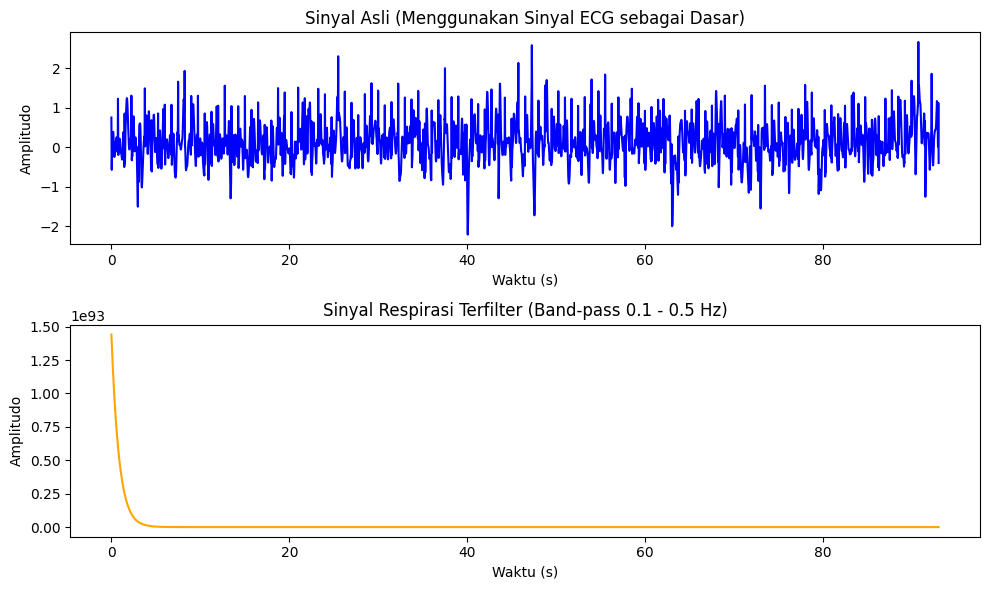

In [17]:
from scipy.signal import butter, filtfilt

# Simulasi sinyal respirasi (menggunakan sinyal ECG sebelumnya sebagai dasar)
resp_signal = nk.ecg_simulate(duration=93, 
                              sampling_rate=150, 
                              heart_rate=80, 
                              noise=0.93, 
                              random_state=20824)

# Parameter filter untuk sinyal respirasi
sampling_rate = 150  # Hz
lowcut = 0.1  # Frekuensi cutoff rendah (Hz) untuk respirasi
highcut = 0.5  # Frekuensi cutoff tinggi (Hz) untuk respirasi
order = 4  # Order filter

# Desain filter Butterworth band-pass
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs  # Frekuensi Nyquist
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Aplikasikan filter band-pass ke sinyal
def apply_filter(data, lowcut, highcut, fs, order):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Filter sinyal respirasi
filtered_resp_signal = apply_filter(resp_signal, lowcut, highcut, sampling_rate, order)

# Plot sinyal asli dan hasil filtering
time = np.linspace(0, 93, len(resp_signal))

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(time, resp_signal, label="Sinyal Asli", color="blue")
plt.title("Sinyal Asli (Menggunakan Sinyal ECG sebagai Dasar)")
plt.xlabel("Waktu (s)")
plt.ylabel("Amplitudo")

plt.subplot(2, 1, 2)
plt.plot(time, filtered_resp_signal, label="Sinyal Terfilter (Respirasi)", color="orange")
plt.title("Sinyal Respirasi Terfilter (Band-pass 0.1 - 0.5 Hz)")
plt.xlabel("Waktu (s)")
plt.ylabel("Amplitudo")
plt.tight_layout()
plt.show()


Source : https://chatgpt.com/share/6709571b-3b2c-8001-95ae-432b2317a6b8
         https://chatgpt.com/share/67095746-7e50-8001-a509-65a475403367
         https://www.youtube.com/watch?v=fJza_AMj_xc
